In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## preprocesssing data

In [2]:
df = pd.read_csv("results.csv")
dg = pd.read_csv("demographic.csv")
de = pd.read_csv("emotion_score.csv")

# filter data
df = df.drop(index=[0,1])
df["StartDate"] = pd.to_datetime(df["StartDate"])
df = df[df["StartDate"] >= pd.to_datetime("2022-11-28")]
df = pd.merge(left=df, right=dg, left_on="Prolific Id", right_on="Participant id", how="left")
df = df.sort_values(by="StartDate")

In [3]:
def reverse_negative_questions(df, list_columns_to_reverse):
    for col in list_columns_to_reverse:
        df[col] = df[col].astype('int')
        df[col] = df[col].apply(lambda x: 8-x)
    return df

In [4]:
l_reverse_e = list(de[de['reversed'] == True]['emotion_q_num'])
l_reverse_e = [f'Emotions_{i}' for i in l_reverse_e]
l_reverse_p = [2, 5, 7, 8, 11, 12]
l_reverse_p = [f'Physical Fitness_{i}' for i in l_reverse_p]

In [5]:
list_columns_to_reverse = l_reverse_e + l_reverse_p
df = reverse_negative_questions(df, list_columns_to_reverse)

## Demographic analysis

In [6]:
# sample size
N = len(df)

In [7]:
# num female
N_female = len(df[df['Gender'].astype(int) == 2])
N_female/N

0.6585365853658537

In [8]:
# age std & mean
df['Age_x'].astype(int).mean(), df['Age_x'].astype(int).std()

(33.84146341463415, 11.068216660971204)

In [9]:
df['Activity.1']

0     1
1     3
2     2
3     1
6     1
     ..
65    2
71    2
69    4
72    1
81    1
Name: Activity.1, Length: 82, dtype: object

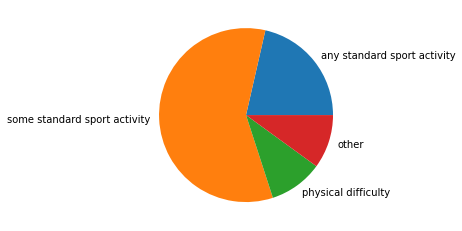

In [10]:
activity = df.groupby('Activity.1')['Ethnicity simplified'].agg(['count']).reset_index()
plt.pie(activity['count'], 
        labels = ['any standard sport activity', 'some standard sport activity',
                  'physical difficulty', 'other'])
plt.show()

In [11]:
(df[df['Activity.1'].astype('int') == 4]['Activity_4_TEXT'])

19    I am trying to gently rebuild my stamina & str...
42                      Currently lazy and out of shape
73    I have psoriatic arthritis which can sometimes...
67    I just don't want to do a sport activity but I...
54                                  my kneecap is loose
68    Very unfit but starting to do some exercise at...
69               i have long covid which causes fatigue
Name: Activity_4_TEXT, dtype: object

In [12]:
df[df['Activity.1'].astype('int') == 3].index

Int64Index([1, 5, 27, 39, 29, 49, 60, 77, 78], dtype='int64')

In [13]:
# remove cols and indexes
cols_to_remove = [
    'Emotions_20', 'Physical Fitness_11',
    'StartDate', 'EndDate', 'Status_x', 'IPAddress', 'Progress',
    'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
    'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
    'ExternalReference', 'LocationLatitude', 'LocationLongitude',
    'DistributionChannel', 'UserLanguage', 'Consent', 'Prolific Id',
    'Activity', 'End of survey', 'Submission id', 'Participant id',
    'Status_y', 'Started at', 'Completed at', 'Reviewed at', 
    'Archived at', 'Time taken', 'Completion code', 'Total approvals',
    'Student status', 
]
indexes_to_remove = [1, 5, 27, 39, 29, 49, 60, 77, 78, 69, 54]
df = df.drop(cols_to_remove, 1)
df = df.drop(indexes_to_remove)
df = df.reset_index(drop=True)

## score emotions and physical fitness

In [15]:
df.columns
cols_emotions = ['Emotions_1', 'Emotions_2', 'Emotions_3', 'Emotions_4', 'Emotions_5',
       'Emotions_6', 'Emotions_7', 'Emotions_8', 'Emotions_9', 'Emotions_10',
       'Emotions_11', 'Emotions_12', 'Emotions_13', 'Emotions_14',
       'Emotions_15', 'Emotions_16', 'Emotions_17', 'Emotions_18',
       'Emotions_19', 'Emotions_21', 'Emotions_22', 'Emotions_23',
       'Emotions_24', 'Emotions_25', 'Emotions_26', 'Emotions_27',
       'Emotions_28', 'Emotions_29', 'Emotions_30']
cols_physical_fitness = ['Physical Fitness_1', 'Physical Fitness_2', 'Physical Fitness_3',
       'Physical Fitness_4', 'Physical Fitness_5', 'Physical Fitness_6',
       'Physical Fitness_7', 'Physical Fitness_8', 'Physical Fitness_9',
       'Physical Fitness_10', 'Physical Fitness_12', 'Physical Fitness_13']

In [17]:
df.columns

Index(['Physical Fitness_1', 'Physical Fitness_2', 'Physical Fitness_3',
       'Physical Fitness_4', 'Physical Fitness_5', 'Physical Fitness_6',
       'Physical Fitness_7', 'Physical Fitness_8', 'Physical Fitness_9',
       'Physical Fitness_10', 'Physical Fitness_12', 'Physical Fitness_13',
       'Emotions_1', 'Emotions_2', 'Emotions_3', 'Emotions_4', 'Emotions_5',
       'Emotions_6', 'Emotions_7', 'Emotions_8', 'Emotions_9', 'Emotions_10',
       'Emotions_11', 'Emotions_12', 'Emotions_13', 'Emotions_14',
       'Emotions_15', 'Emotions_16', 'Emotions_17', 'Emotions_18',
       'Emotions_19', 'Emotions_21', 'Emotions_22', 'Emotions_23',
       'Emotions_24', 'Emotions_25', 'Emotions_26', 'Emotions_27',
       'Emotions_28', 'Emotions_29', 'Emotions_30', 'doing_sport',
       'Activity.1', 'Activity_4_TEXT', 'Gender', 'Age_x', 'Fluent languages',
       'Age_y', 'Sex', 'Ethnicity simplified', 'Country of birth',
       'Country of residence', 'Nationality', 'Language', 'Employment

In [21]:
df['emotion_score'] = df[cols_emotions].mean(axis=1)
df['physical_fitness_score'] = df[cols_physical_fitness].mean(axis=1)

In [23]:
df['emotion_score'].corr(df['physical_fitness_score'])

0.587322636402717